# 1. Load the Dataset

In [2]:
# !pip install missingno

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
import tarfile
# import mxnet as mx
import datetime
import json
import time
from tabulate import tabulate
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import missingno as msno
import sklearn.preprocessing as preprocessing

# PCA
from sklearn.decomposition import PCA

In [3]:
# Step 1: Load the Dataset
# Load the mall customers dataset from a CSV file into a Pandas DataFrame.
# This allows for easy data manipulation and analysis.
df = pd.read_csv('Telecom_customer churn.csv')

# # Step 2: Select Relevant Features
# # Focus on the features ''Annual Income (k$)', and 'Spending Score (1-100)' for analysis.
# df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# # Step 3: Convert Data for Machine Learning
# # Convert the selected DataFrame into a NumPy array of type 'float32'.
# # This conversion is necessary as most machine learning frameworks work efficiently with NumPy arrays.
# data_np = df.values.astype('float32')

# # Step 4: Save Preprocessed Data
# # Save the preprocessed dataset to a CSV file, without the index.
# df.to_csv('mall_data-one-a.csv', index=False)

# # Confirming the data has been preprocessed and saved.
# print("Preprocessed dataset saved as 'mall_data-one-a.csv'.")

# Display the first few rows of the processed dataset to verify the preprocessing steps.
print(df.head())

   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0          0.0          0.0        0.0     -157.25  ...       0.0       N   
1          9.1          0.0        0.0      532.25  ...       0.0       Z   
2          0.0          0.0        0.0       -4.25  ...       0.0       N   
3          0.0          0.0        0.0       -1.50  ...       0.0       U   
4          0.0          0.0        0.0       38.50  ...       0.0       I   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0       U       U

# 2. Decide which Features to Include

In [4]:
columns_to_keep = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean',
 'opk_dat_Mean',
 'mou_opkv_Mean',
 'mou_opkd_Mean',
 'drop_blk_Mean',
 'attempt_Mean',
 'complete_Mean',
 'callfwdv_Mean',
 'callwait_Mean',
 'churn',
 'months',
 'uniqsubs',
 'actvsubs',
 'new_cell',
 'crclscod',
 'asl_flag',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_price',
 'phones',
 'models',
 'hnd_webcap',
 'truck',
 'rv',
 'ownrent',
 'lor',
 'dwlltype',
 'marital',
 'adults',
 'income',
 'numbcars',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd',
 'eqpdays',	
 ]

# columns_to_drop = [column for column in df.columns if column not in columns_to_keep] 

columns_to_drop = ['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod', 'Customer_ID']

df.drop(columns_to_drop, axis=1, inplace=True)

# 3. Handle Missing Values

## 3.1. Analyzing Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

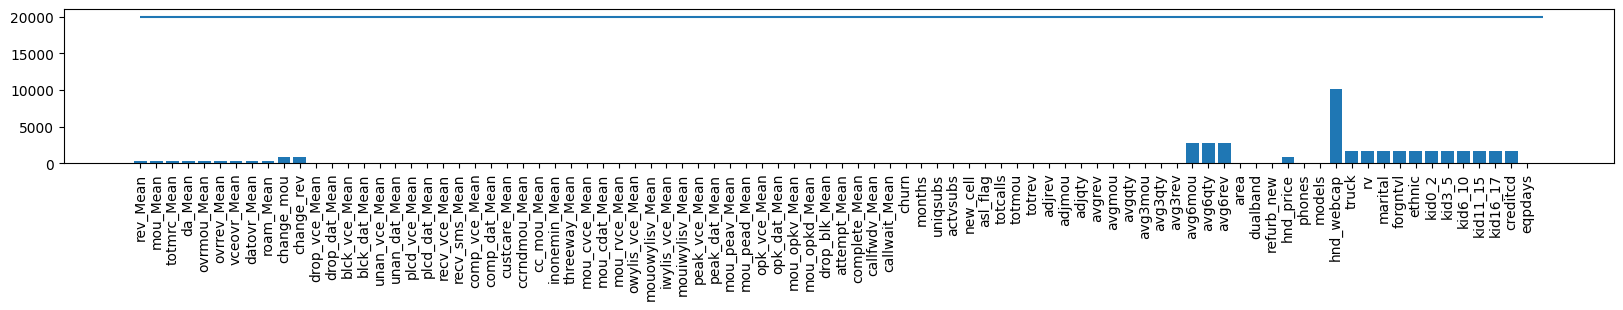

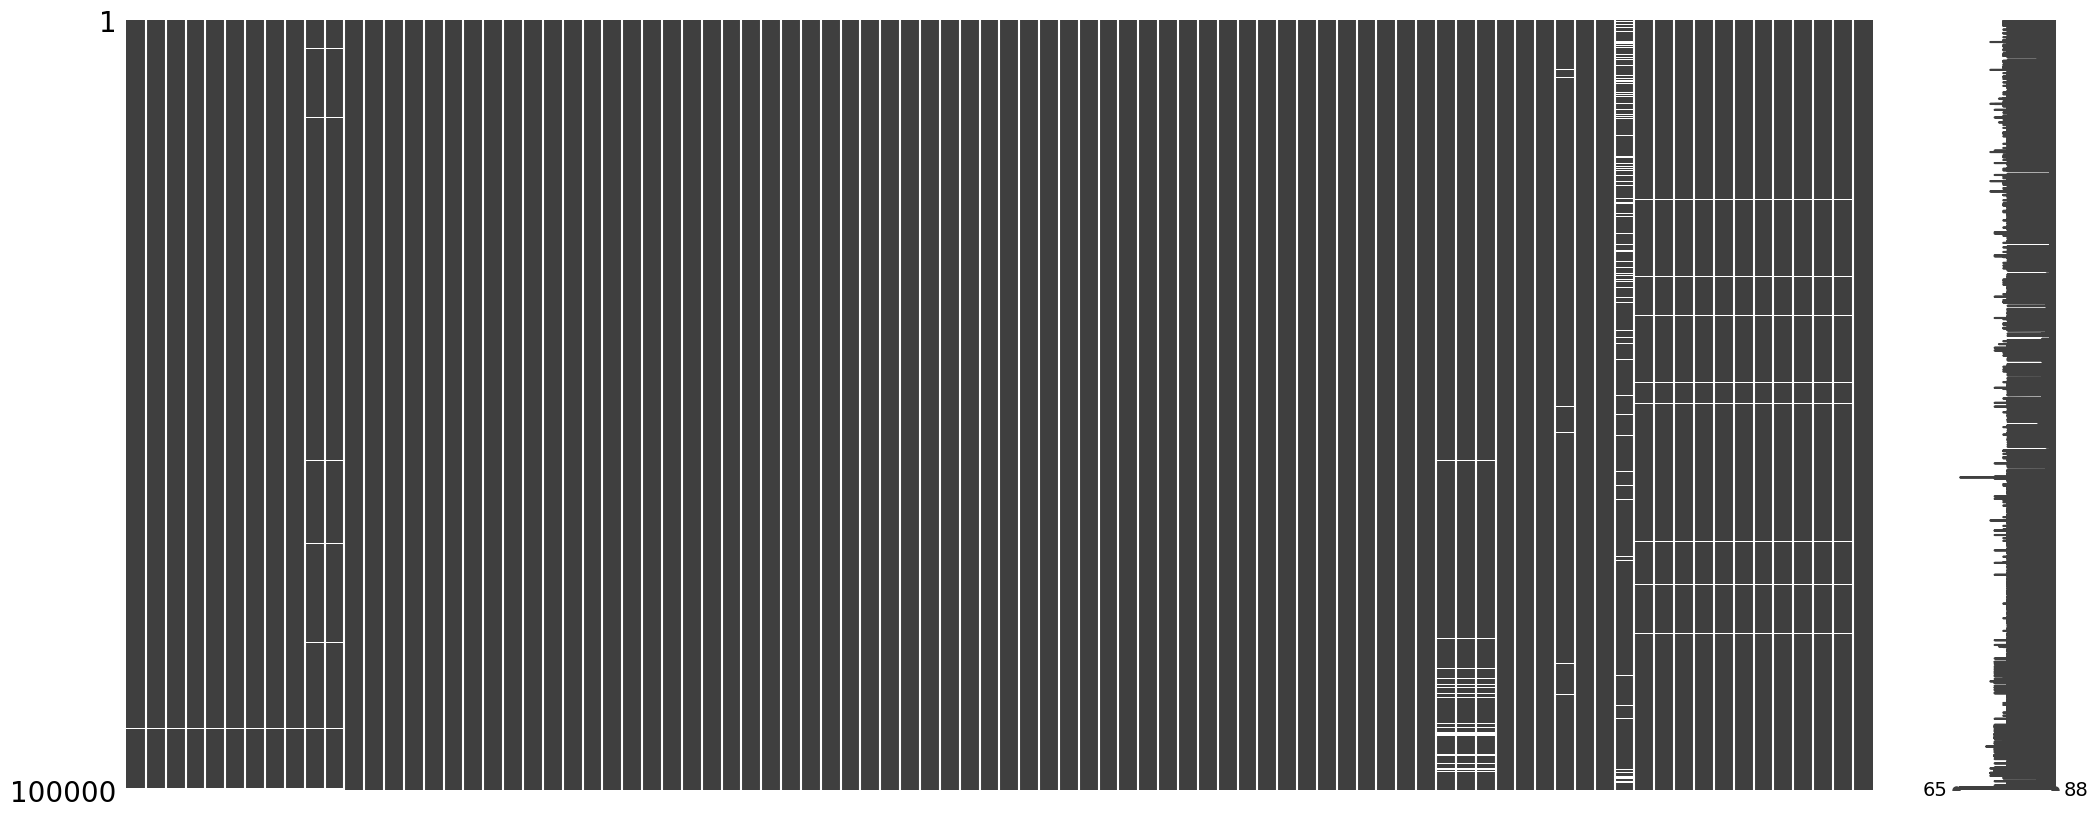

In [6]:
DROP_THREASHOLD = 0.20


plt.figure(figsize=(20,2))
plt.bar(df.columns, df.isna().sum())
plt.hlines(y=100000*DROP_THREASHOLD, xmin=0, xmax=df.columns.shape)
plt.xticks(rotation=90)
plt.show()

msno.matrix(df)
plt.show()

# plt.figure(figsize=(30,2))
# sns.heatmap(df)
# plt.bar(df.columns, df.isna().sum())
# plt.show()

# plt.plot()
# df.isna().sum()

## 3.2. Drop Columns with Too Many Missing Values


In [7]:
def drop_high_missing_columns(dataframe, threshold=0.3):
    """
    Drop any column that has a fraction of missing values 
    greater than the given threshold (default=0.3).
    
    For example, 0.3 means 30% of that column's values are missing.
    """
    # fraction of missing values for each column
    missing_fraction = dataframe.isnull().mean()
    
    # which columns are above the threshold
    cols_to_drop = missing_fraction[missing_fraction > threshold].index
    print(f"Columns to drop (>{threshold*100}% missing):", list(cols_to_drop))
    
    # drop them in place
    dataframe.drop(columns=cols_to_drop, inplace=True)
    
    return dataframe

drop_high_missing_columns(df, DROP_THREASHOLD)
df

Columns to drop (>20.0% missing): []


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,S,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,S,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,M,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,M,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,S,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,0.0,S,U,U,U,Y,U,Y,773.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,0.0,N,U,U,Y,Y,Y,Y,835.0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,B,0.0,U,Y,Y,U,U,U,N,433.0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,U,0.0,S,U,U,U,U,U,N,75.0


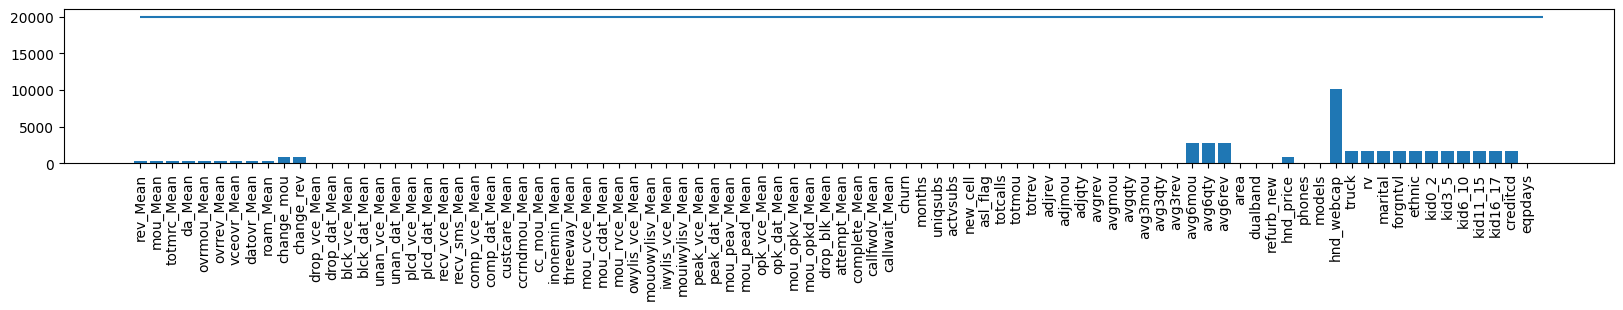

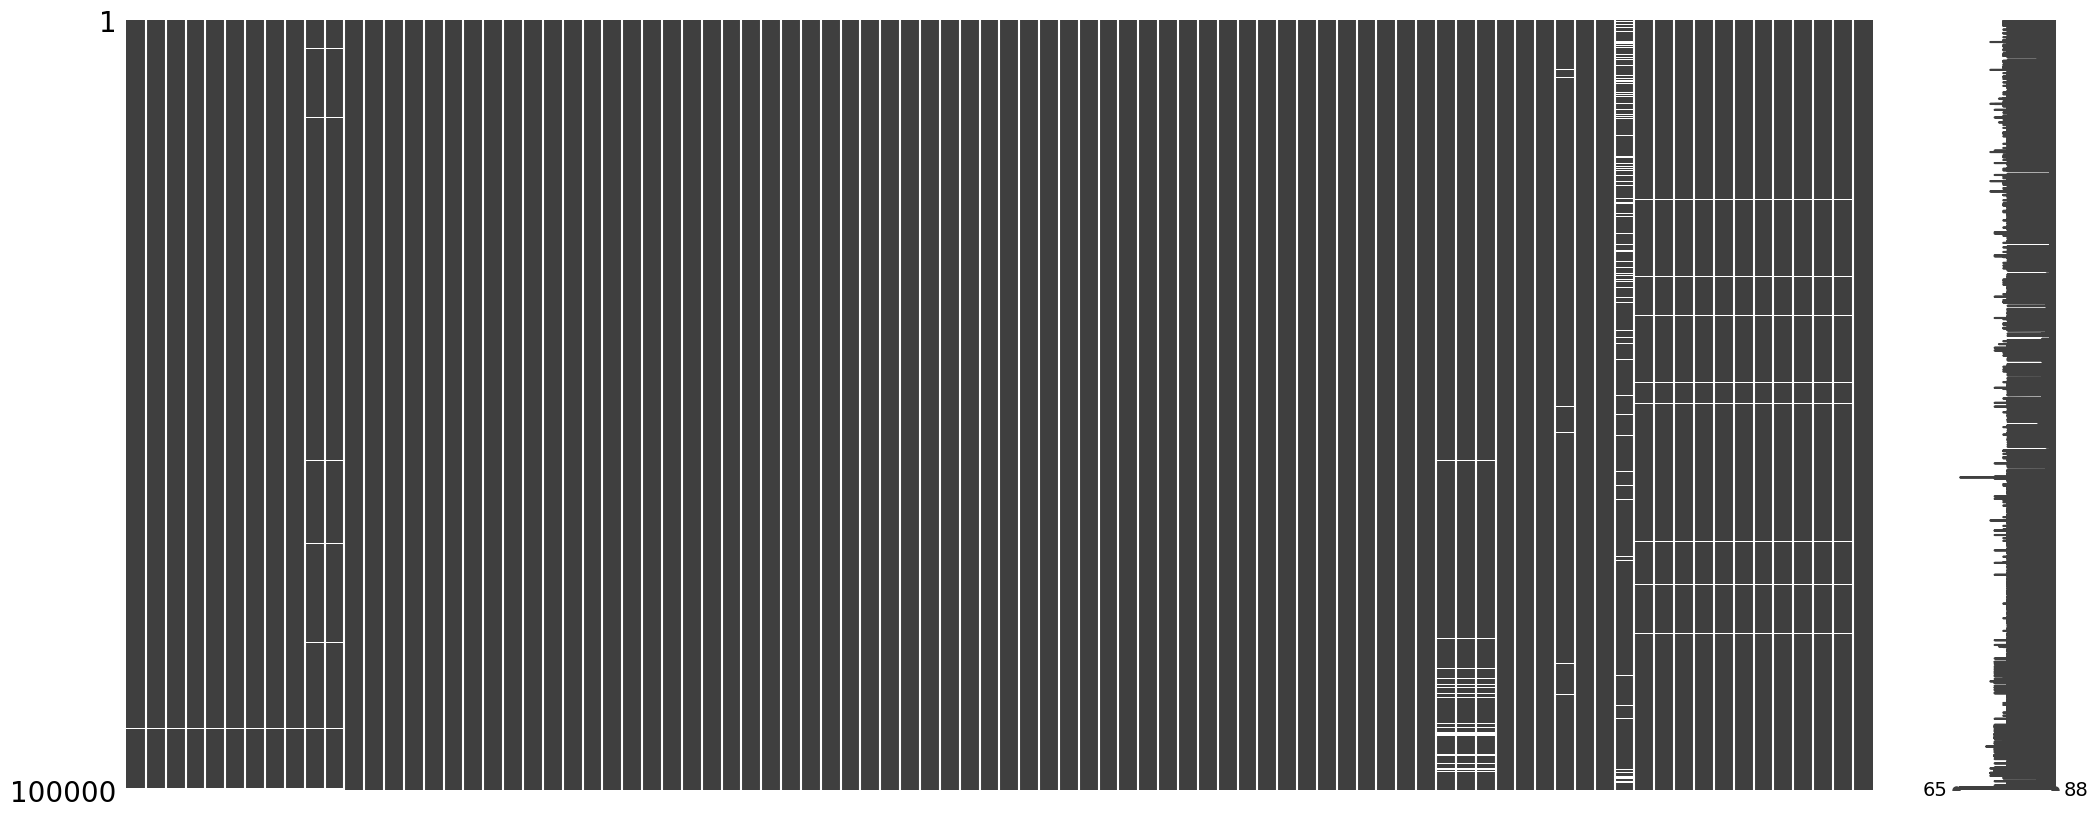

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

In [8]:
plt.figure(figsize=(20,2))
plt.bar(df.columns, df.isna().sum())
plt.hlines(y=20000, xmin=0, xmax=df.columns.shape)
plt.xticks(rotation=90)
plt.show()
msno.matrix(df)
plt.show()
df.info()

## 3.3. Fill Missing Values

In [9]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())

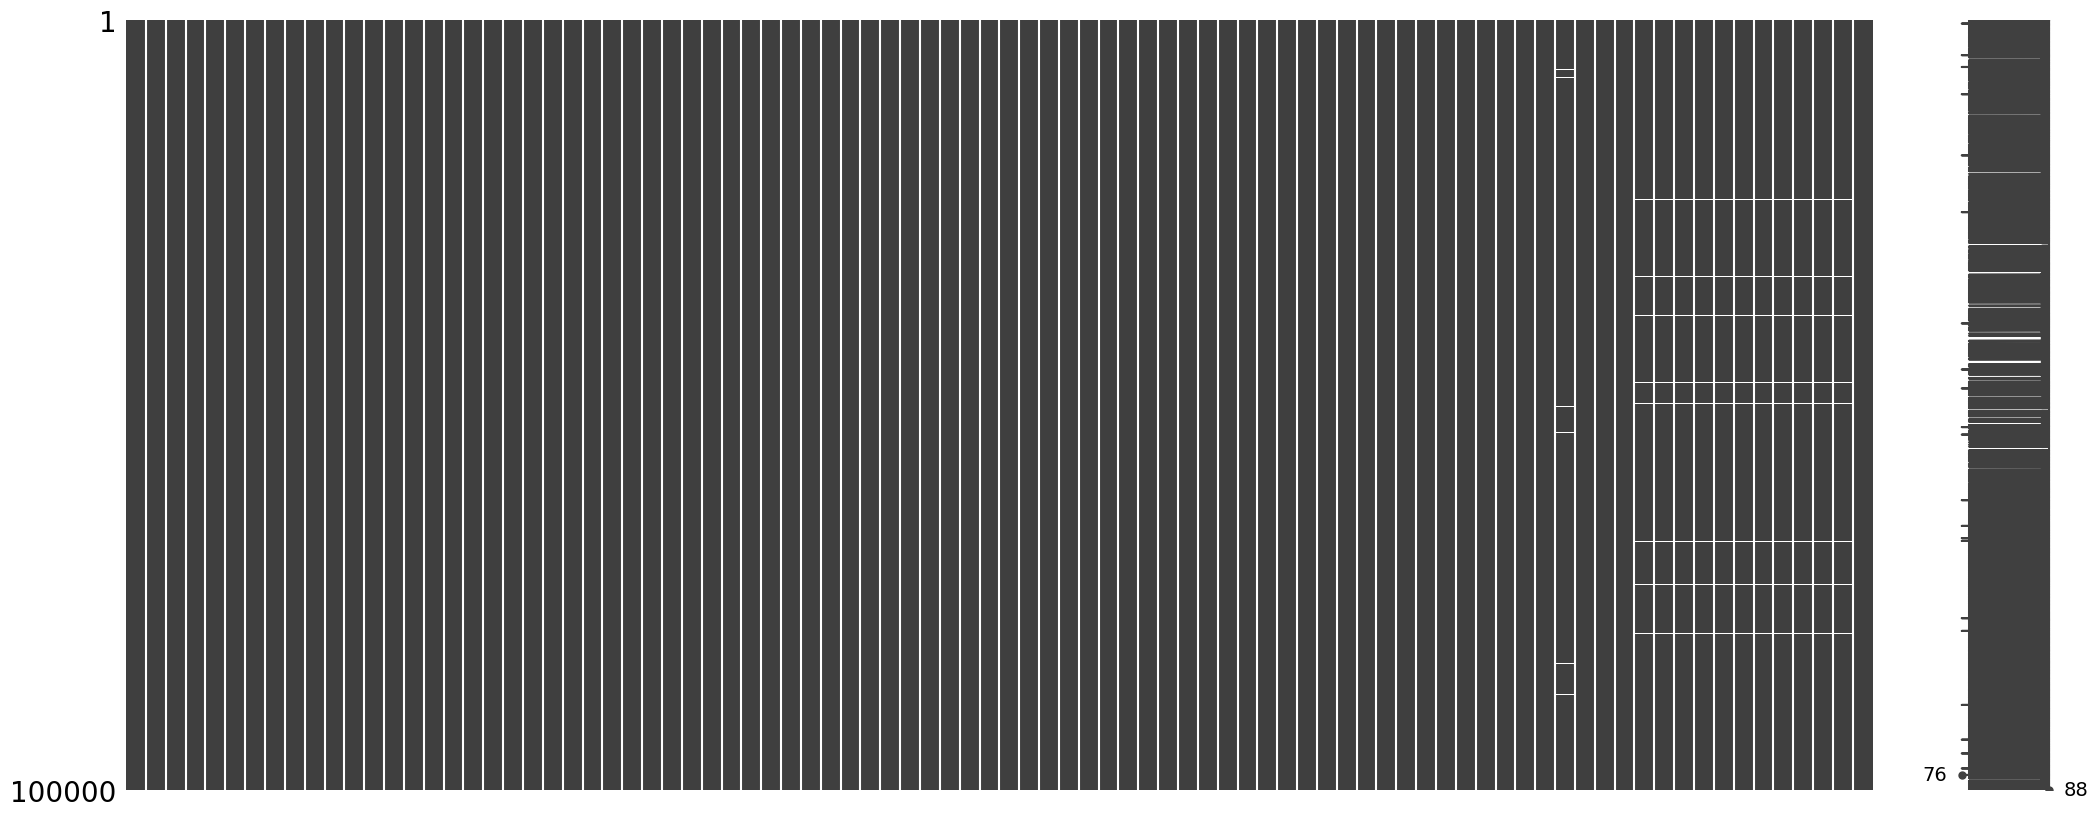

['area',
 'dualband',
 'refurb_new',
 'hnd_price',
 'phones',
 'models',
 'truck',
 'rv',
 'marital',
 'forgntvl',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd',
 'eqpdays']

In [10]:
msno.matrix(df)
plt.show()
[col for col in df.columns if df[col].isnull().any()]

## 3.4. Drop Rows with Missing Values

In [11]:
df.dropna(inplace=True)

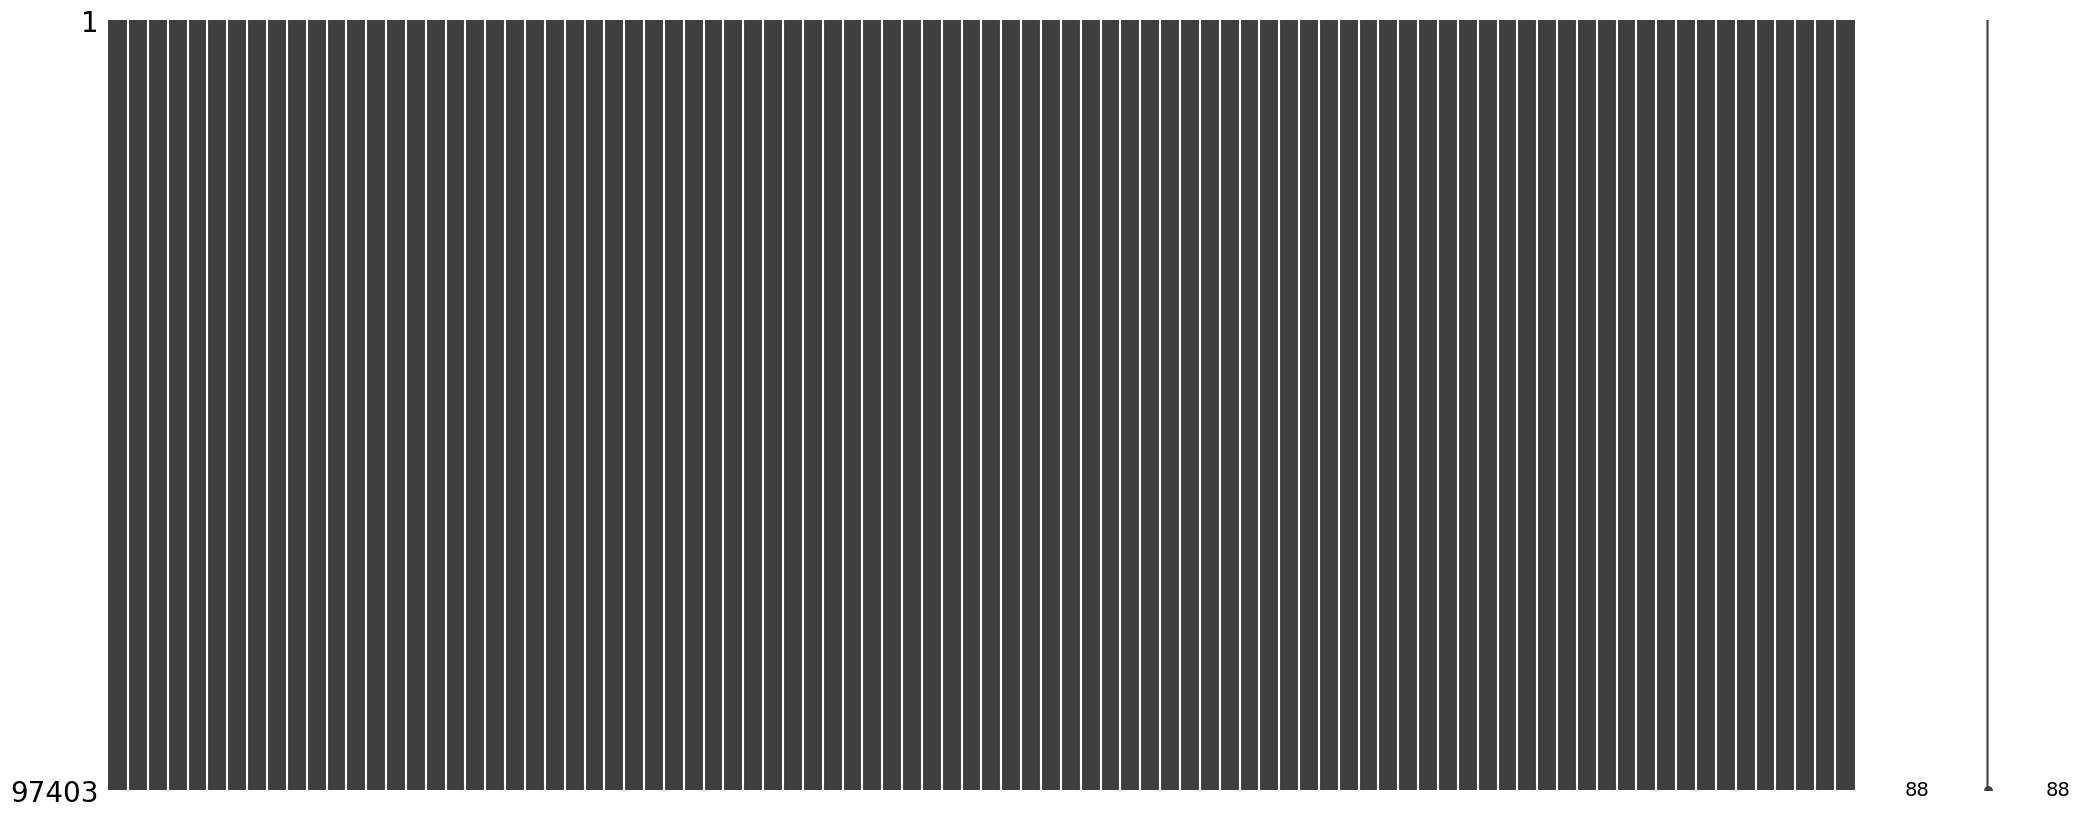

[]

In [12]:
msno.matrix(df)
plt.show()
[col for col in df.columns if df[col].isnull().any()]

# 4. Normalize Data

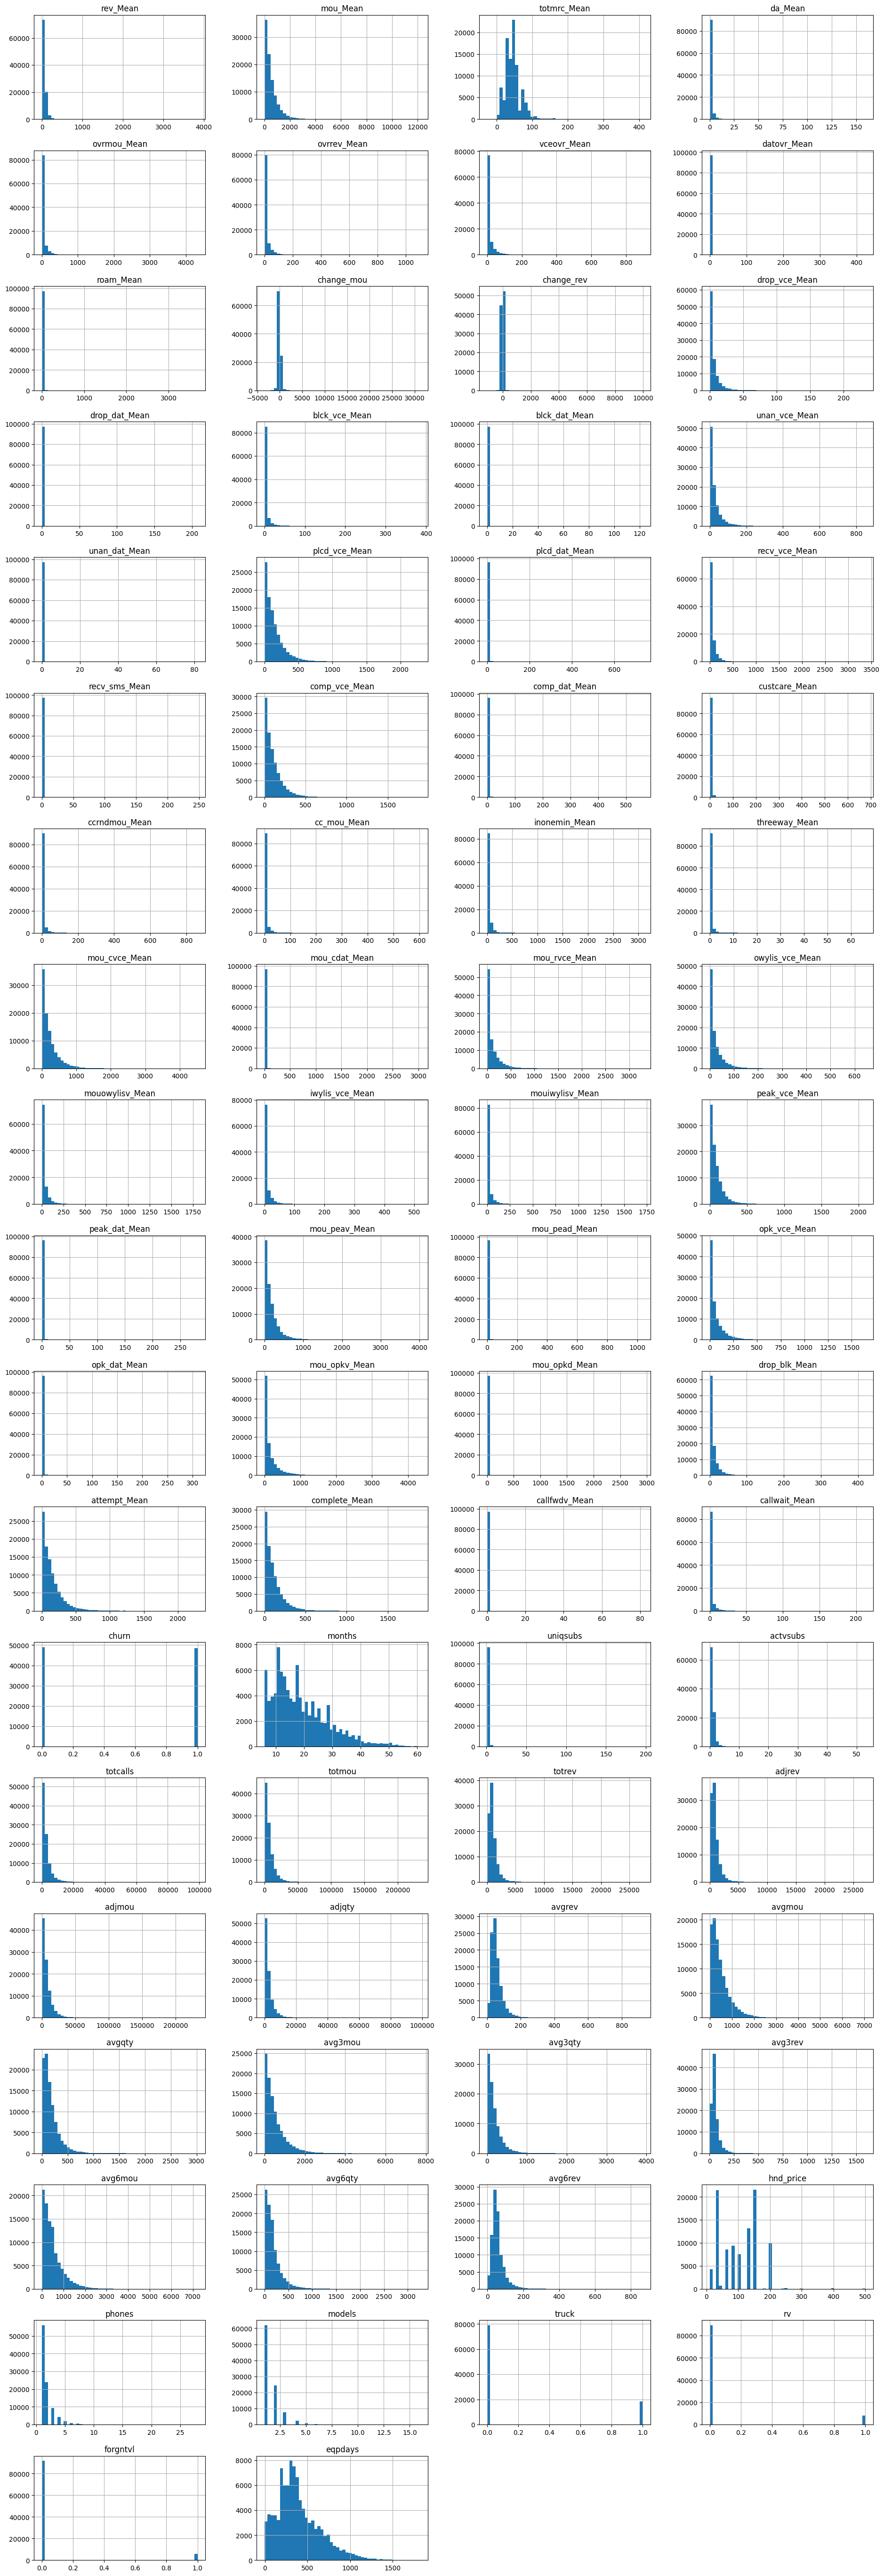

In [13]:
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4))
plt.show()

In [14]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

f_sqrt = (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)

for i in numerical_features:    
    df[i] = df[i].apply(f_sqrt)
    


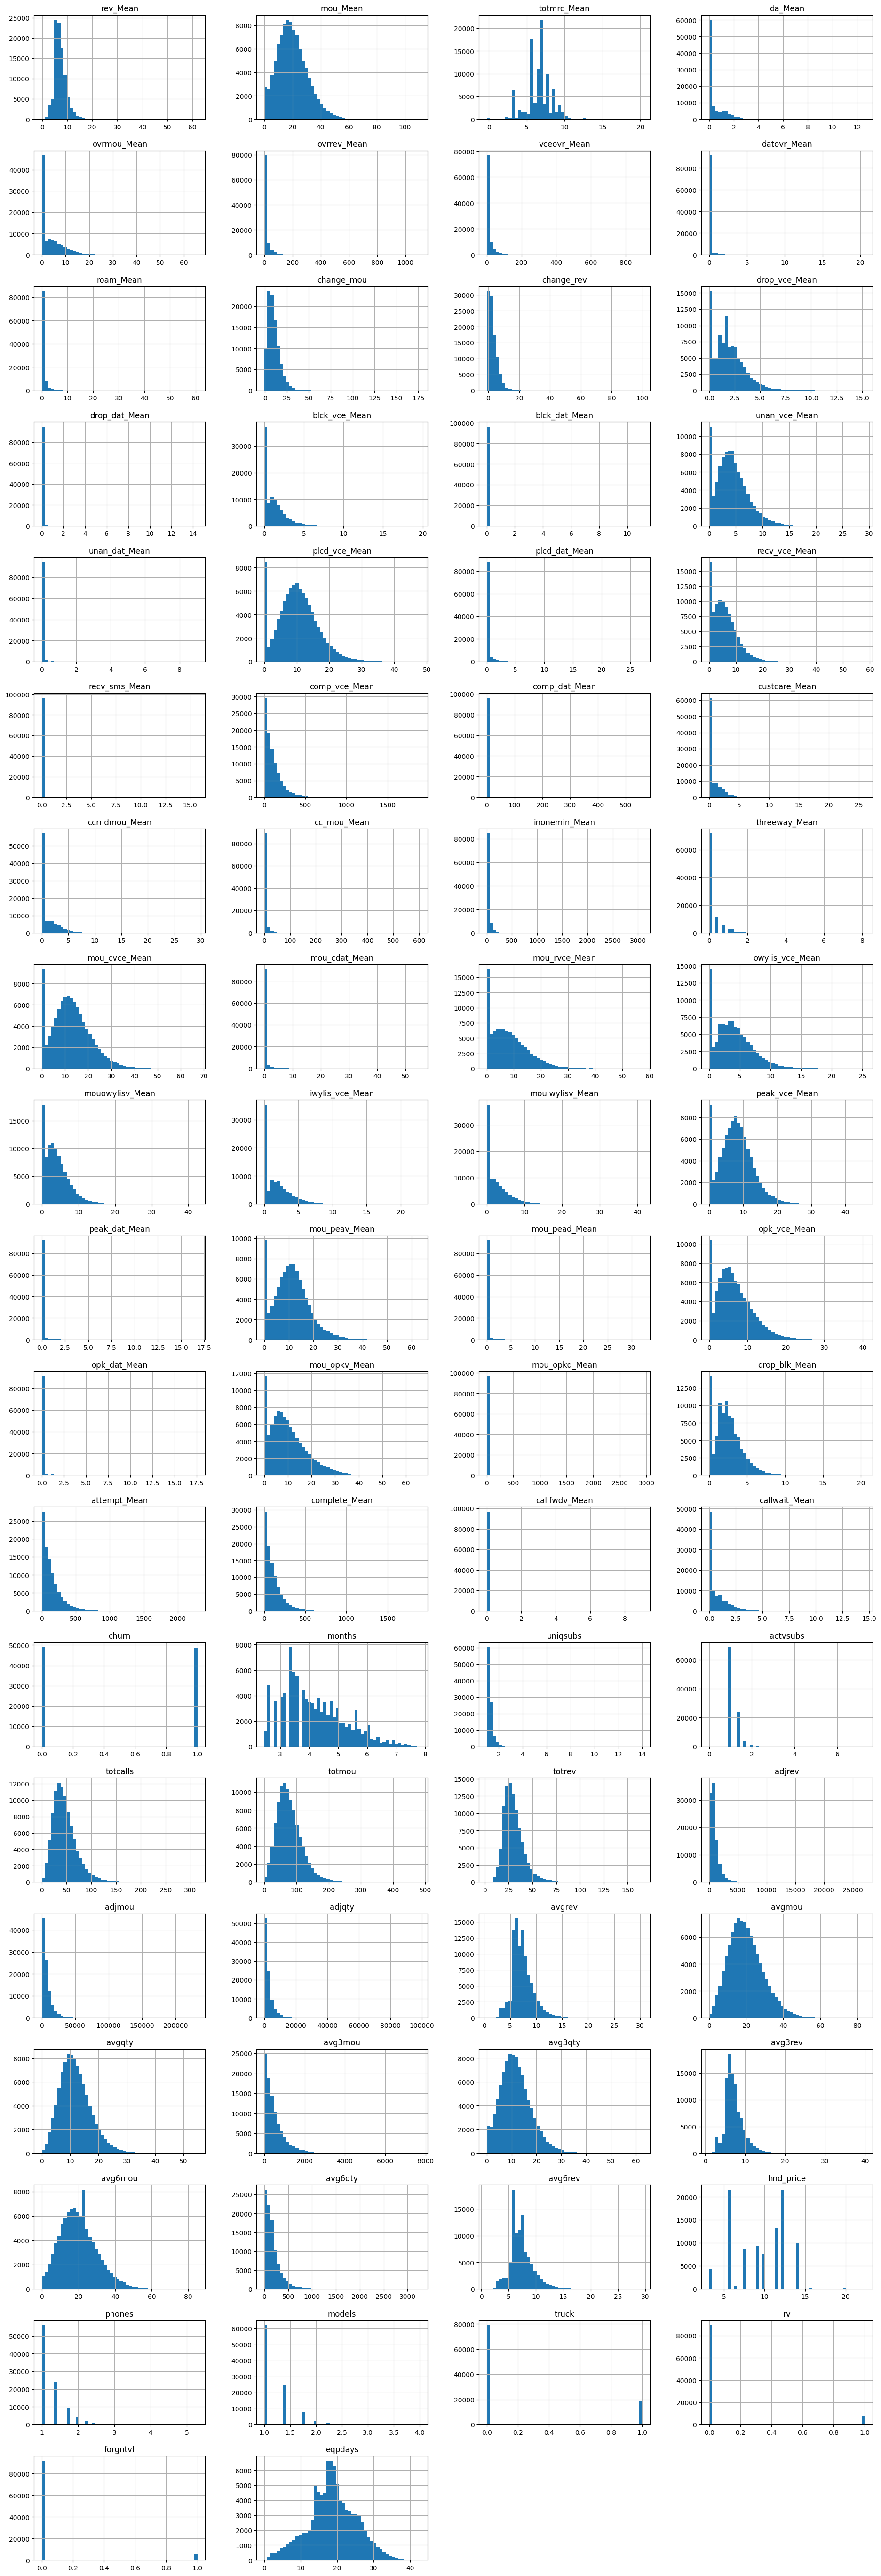

In [15]:
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4))
plt.show()

# 5. Encode Categorical Features

decipher: 
- martial status
- Handset web capability
- crclscod
- new cell phone user


In [16]:
print(df.select_dtypes(exclude='number').columns)

Index(['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
       'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd'],
      dtype='object')


In [17]:
encoding = []
for i in df.select_dtypes(include='object'):   
    encoding.append(i)
    print(i, df[i].nunique())
encoding

new_cell 3
asl_flag 2
area 19
dualband 3
refurb_new 2
hnd_webcap 3
marital 5
ethnic 17
kid0_2 2
kid3_5 2
kid6_10 2
kid11_15 2
kid16_17 2
creditcd 2


['new_cell',
 'asl_flag',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [18]:
fedf = df.copy()
fedf = pd.get_dummies(fedf, drop_first=False, columns=encoding, prefix=encoding)
fedf

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,4.898724,14.807093,4.743416,0.247500,0.000000,0.00000,0.000000,0.000000,0.000000,12.539936,...,True,False,True,False,True,False,True,False,False,True
2,4.121893,3.201562,4.121893,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.061553,...,False,True,True,False,True,False,True,False,False,True
3,6.164414,2.738613,6.164414,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.224745,...,True,False,True,False,True,False,True,False,False,True
4,7.431689,23.885142,8.484103,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.204837,...,True,False,True,False,True,False,True,False,False,True
5,9.070557,36.224991,8.660254,1.112430,0.000000,0.00000,0.000000,0.000000,0.000000,12.519984,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.662897,22.661861,6.795523,0.888828,6.408763,13.55956,13.295062,0.261318,1.134198,3.732803,...,True,False,True,False,False,True,True,False,False,True
99996,7.662897,22.661861,6.795523,0.888828,6.408763,13.55956,13.295062,0.261318,1.134198,3.732803,...,True,False,False,True,False,True,False,True,False,True
99997,7.662897,22.661861,6.795523,0.888828,6.408763,13.55956,13.295062,0.261318,1.134198,3.732803,...,False,True,True,False,True,False,True,False,True,False
99998,7.662897,22.661861,6.795523,0.888828,6.408763,13.55956,13.295062,0.261318,1.134198,3.732803,...,True,False,True,False,True,False,True,False,True,False


# 6. Scale Data

In [19]:
scaler = preprocessing.MinMaxScaler()

ready_data = scaler.fit_transform(fedf)

rdf = pd.DataFrame(ready_data, columns=fedf.columns, index=fedf.index)

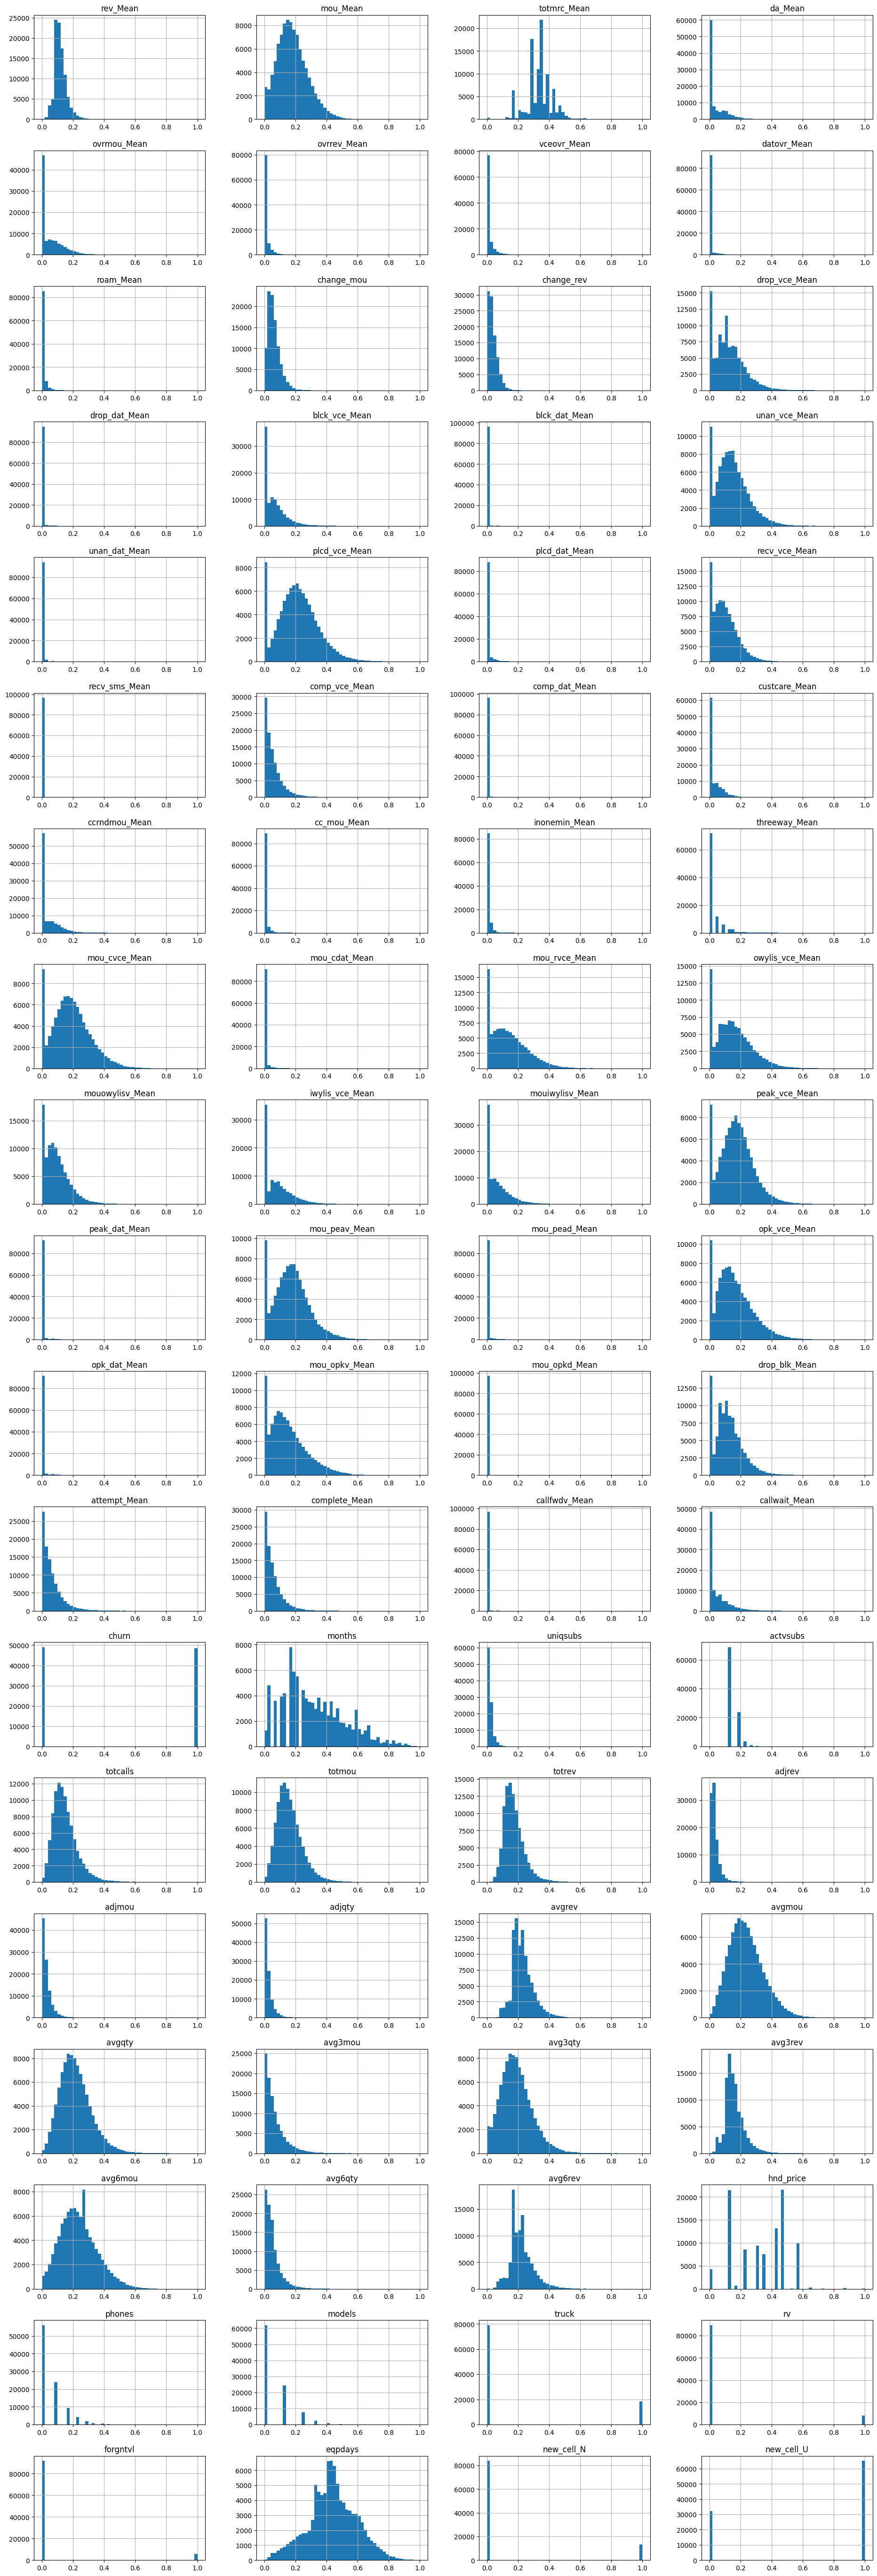

In [20]:
rdf.iloc[:,:76].hist(bins=50,figsize=(23,74),layout=(20,4))
plt.show()

In [47]:
# sns.heatmap(fedf.corr())

df # raw dataframe where we dropped the features we don't want, categorical values are still letters and in their categories, not normalized
fedf # encoded categorical features into one-hot binary features, not normalized
rdf # encoded categorical features into one-hot binary features, NORMALIZED

rdf

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,0.081390,0.134020,0.244800,0.019604,0.000000,0.0000,0.000000,0.000000,0.000000,0.074898,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.068892,0.028978,0.214527,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.015845,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.101754,0.024787,0.314013,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.011129,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.122143,0.216186,0.426999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.039195,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.148511,0.327875,0.435579,0.088113,0.000000,0.0000,0.000000,0.000000,0.000000,0.074786,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.125863,0.205114,0.344753,0.070402,0.097498,0.0123,0.014837,0.012698,0.018684,0.025264,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
99996,0.125863,0.205114,0.344753,0.070402,0.097498,0.0123,0.014837,0.012698,0.018684,0.025264,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
99997,0.125863,0.205114,0.344753,0.070402,0.097498,0.0123,0.014837,0.012698,0.018684,0.025264,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
99998,0.125863,0.205114,0.344753,0.070402,0.097498,0.0123,0.014837,0.012698,0.018684,0.025264,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# PROF CODE

# Library Imports and Setup

In [ ]:
# # Install the mxnet library required for certain functionalities in SageMaker
!pip install mxnet

# # AWS SageMaker and Boto3
import sagemaker
from sagemaker import get_execution_role, KMeans
from sagemaker.image_uris import retrieve
from sagemaker.model import Model
from sagemaker.predictor import Predictor
from sagemaker.serializers import CSVSerializer
import boto3
from botocore.exceptions import ClientError



# SageMaker Setup and Configuration

In [ ]:
# Initialize a SageMaker Session
# A SageMaker Session helps in managing the interactions with the AWS SageMaker service, such as creating and training models, and deploying endpoints.
sagemaker_session = sagemaker.Session()

# Retrieve the IAM role
# The IAM role is required by SageMaker to access AWS resources (e.g., S3 buckets) on your behalf.
role = get_execution_role()

# Identify the AWS Region of the SageMaker Session
# This information is used to ensure that resources are created in the same region as the SageMaker session.
region = sagemaker_session.boto_region_name

# Create Boto3 Clients for S3 and SageMaker
# These clients enable programmatic access to S3 and SageMaker services for operations like uploading data and creating training jobs.
s3_client = boto3.client('s3')
sagemaker_client = boto3.client('sagemaker')

# Retrieve the Docker image URI for the KMeans algorithm
# This URI is specific to the AWS region and is used to pull the appropriate image for training.
image_uri = retrieve('kmeans', region)

# Define the Default S3 Bucket for SageMaker
# SageMaker requires an S3 bucket to store training data, models, and outputs. Here, we use the session's default bucket.
bucket = sagemaker_session.default_bucket()

# Set the S3 Prefix for Storing Data
# The prefix is used to organize the data in the bucket, making it easier to manage and locate.
prefix = 'sagemaker/mall/kmeans-all'

# Output the IAM Role ARN and AWS Region for verification
print("Execution Role ARN:", role)
print("AWS Region:", region)

[03/28/25 18:24:31] INFO     Found credentials from IAM Role:                                   ]8;id=933699;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=650671;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=885304;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=264566;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[03/28/25 18:24:32] INFO     Found credentials from IAM Role:                                   ]8;id=401100;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=46696;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Same images used for training and inference. Defaulting to image     ]8;id=452263;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=711527;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#393\393]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=812179;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=868722;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

Execution Role ARN: arn:aws:iam::347566598429:role/LabRole
AWS Region: us-east-1


In [ ]:
pca_30 = PCA(n_components=30).fit_transform(rdf)

In [45]:
pca_30.shape

(97403, 30)

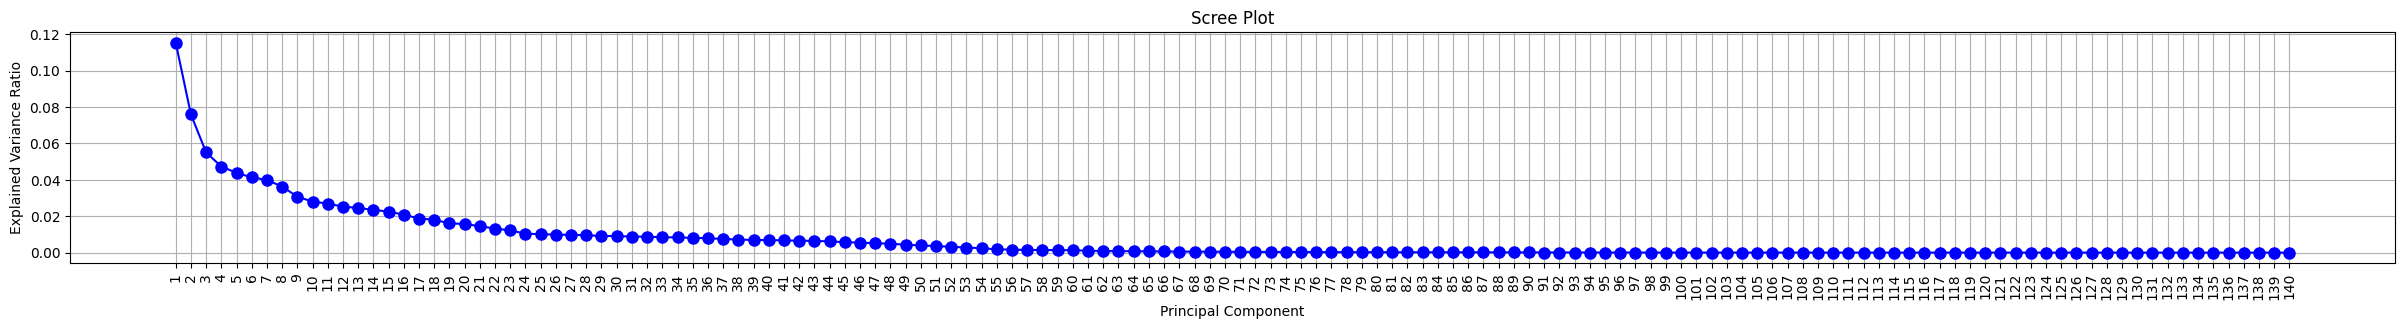

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the normalized data 'rdf'
pca = PCA()
pca.fit(rdf)

# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Generate the scree plot
plt.figure(figsize=(0, 3))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'bo-', markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1), rotation=90)
plt.grid(True)
plt.show()


In [35]:
import umap

# Apply UMAP to reduce to 2D
umap_reducer = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1)
umap_result = umap_reducer.fit_transform(pca_30)


c:\Users\henry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [37]:
umap_result.shape

(97403, 2)

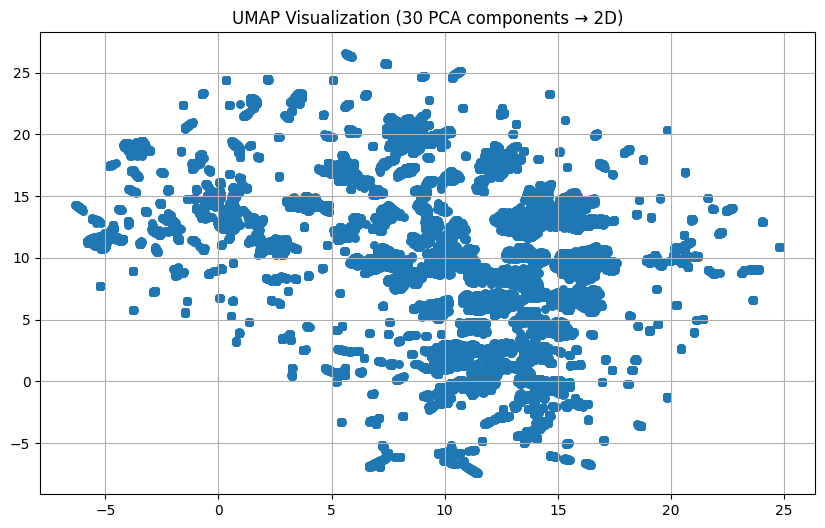

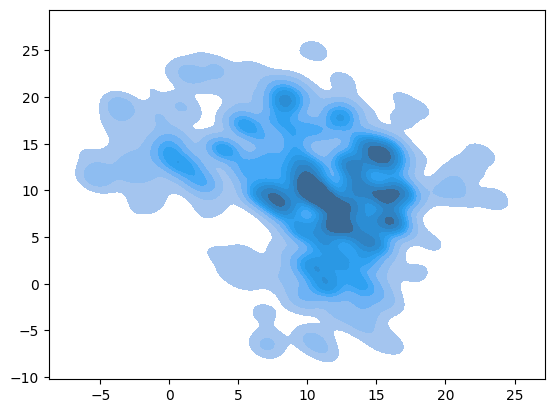

In [44]:
samples = 100_000


# Plot
plt.figure(figsize=(10, 6))
plt.scatter(umap_result[:samples, 0], umap_result[:samples, 1], s=30)
plt.title("UMAP Visualization (30 PCA components → 2D)")
plt.grid(True)
plt.show()


sns.kdeplot(x=umap_result[:samples, 0], y=umap_result[:samples, 1], fill=True,)
plt.show()

# KMeans Model Training

In [ ]:
# Define the range of k values for the KMeans clustering
# This range will determine how many models we train, each with a different number of clusters.
k_values = range(2, 8)

# Initialize lists to keep track of the S3 paths for the trained models and their training job names.
model_paths = []
training_jobs = []

# Set the output path in the S3 bucket for the trained models
# This path will be used to store the output (model artifacts) of each training job.
output_path = f's3://{sagemaker_session.default_bucket()}/sagemaker/mall/kmeans-one-a/output'

# Iterate over each k value to train a separate KMeans model for that number of clusters
for k in k_values:
    # Generate a unique job name for each training job based on the k value
    job_name = f'kmeans-mall-one-a-k-{k}'
    
    # Initialize the KMeans estimator from SageMaker with the specific k value
    # Configuration includes instance type, number of instances, and the specified k value.
    kmeans = KMeans(
        sagemaker_session=sagemaker_session,
        role=role,
        instance_count=1,
        instance_type='ml.m5.large',
        k=k,
        output_path=output_path,
        job_name=job_name,
        feature_dim=2  # Specify the number of features in the input data
    )
    
    # Start the training job for the KMeans model
    # We use 'wait=False' to start each training job asynchronously.
    kmeans.fit(kmeans.record_set(data_np), wait=False)
    training_jobs.append((k, kmeans.latest_training_job.name))

# After initiating all training jobs, we wait for each to complete and collect their model URIs
for k, job_name in training_jobs:
    # Wait for the completion of the training job
    sagemaker_client.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
    
    # Retrieve the S3 URI of the model artifacts for the completed training job
    training_job_description = sagemaker_client.describe_training_job(TrainingJobName=job_name)
    model_s3_uri = training_job_description['ModelArtifacts']['S3ModelArtifacts']
    model_paths.append((k, model_s3_uri))

# Print the S3 paths of the model artifacts for all trained models
# This provides a clear reference to the location of each model for further analysis or deployment.
headers = ['k Value', 'S3 Model Artifact Path']
print(tabulate(model_paths, headers=headers))

# Determine K through Elbow Plot

In [ ]:
# List to store the Sum of Squared Errors (SSE) for each value of K
sse_values = []

# Iterate over each trained model's path to calculate SSE
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate SSE for this value of K
        sse = np.sum((data_np - centroids[closest_centroids])**2)
        sse_values.append(sse)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Create and display the Elbow Plot using seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=[k for k, _ in model_paths], y=sse_values, marker='o')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks([k for k, _ in model_paths])
plt.show()

# Determine K through using Silhouette Method

In [ ]:
# List to store the silhouette scores for each value of K
silhouette_scores = []

# Iterate over each trained model's path to calculate its silhouette score
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate the silhouette score for this value of K
        silhouette_score_value = silhouette_score(data_np, closest_centroids)
        silhouette_scores.append(silhouette_score_value)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Plot the silhouette scores for different values of K, if available
if silhouette_scores:  # Ensure the list is not empty
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=[k for k, _ in model_paths], y=silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Determining Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
    plt.show()
else:
    print("No silhouette scores to plot.")

# Visualize the centroids for the optimal K value and display the cluster assignments for each datapoint

In [ ]:
# Specify the best K value
best_k = 5

# Find the model path for the best K value
best_model_path = next(path for k, path in model_paths if k == best_k)

# Define the local path to save the best model
local_path = '/tmp/best_model.tar.gz'

# Download the best model from S3 to the local path
s3_client.download_file(sagemaker_session.default_bucket(), best_model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)

# Extract the model parameters
with tarfile.open(local_path) as tar:
    tar.extractall(path='/tmp/best_model')

# Load the best KMeans model parameters
kmeans_best_params = mx.ndarray.load('/tmp/best_model/model_algo-1')
centroids_best = kmeans_best_params[0].asnumpy()  # Extract the centroids

# Calculate the closest centroids for each data point
distances_best = np.sqrt(((data_np - centroids_best[:, np.newaxis])**2).sum(axis=2))
cluster_labels = np.argmin(distances_best, axis=0)  # Assign clusters

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Set the Seaborn theme for the plots
sns.set_theme(style="whitegrid")

# Plot the data points with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=50)

# Plot the centroids
for i, centroid in enumerate(centroids_best):
    plt.scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label=f'Centroid' if i == 0 else None)

plt.title('Mall Customer Segmentation with Clusters and Centroids')  # Set the plot title
plt.xlabel('Annual Income (k$)')  # Set the x-axis label
plt.ylabel('Spending Score (1-100)')  # Set the y-axis label
plt.legend()  # Show the legend
plt.show()  # Display the plot


# Model Deployment to SageMaker Endpoint

In [ ]:
# Specify names for the endpoint and its configuration
endpoint_name = 'mall-kmeans-one-a'
endpoint_config_name = 'mall-kmeans-one-a'

# Function to wait for endpoint configuration deletion
def wait_for_endpoint_config_deletion(endpoint_config_name):
    print(f'Waiting for endpoint configuration "{endpoint_config_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint configuration "{endpoint_config_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint configuration if it exists
try:
    sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
    print(f'Endpoint configuration "{endpoint_config_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
    wait_for_endpoint_config_deletion(endpoint_config_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')

# Function to wait for endpoint deletion
def wait_for_endpoint_deletion(endpoint_name):
    print(f'Waiting for endpoint "{endpoint_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint "{endpoint_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint if it exists
try:
    sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
    print(f'Endpoint "{endpoint_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
    wait_for_endpoint_deletion(endpoint_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint "{endpoint_name}" does not exist.')

# Identify the best model based on prior analysis
best_k = 6  # Assuming best_k is determined through prior analysis
best_model_s3_uri = next(path for k, path in model_paths if k == best_k)

# Create a SageMaker Model object with the best model's artifacts
best_model = Model(
    model_data=best_model_s3_uri,
    image_uri=image_uri,
    role=role,
    sagemaker_session=sagemaker_session
)

# Deploy the model to an endpoint
# Note: This operation can take several minutes to complete.
predictor = best_model.deploy(
    endpoint_name=endpoint_name,
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

print(f'Model deployed to endpoint: {endpoint_name}')

# Cluster Associations and Centroids

In [ ]:
# Initialize a Predictor object for the deployed SageMaker endpoint
predictor = Predictor(endpoint_name=endpoint_name, serializer=CSVSerializer())

def get_user_input(prompt):
    """Function to get user input; allows quitting by typing 'quit'."""
    user_input = input(prompt).strip()
    if user_input.lower() == 'quit':
        return None
    return user_input

def validate_and_prompt(feature_name, feature_prompt):
    """Validate and repeatedly prompt until a valid input or 'quit' is entered."""
    while True:
        user_input = get_user_input(feature_prompt)
        if user_input is None:  # User chose to exit
            return None
        try:
            # Ensure input is within the valid range for Annual Income and Spending Score
            value = float(user_input)
            if feature_name == 'Annual Income' and (0 < value <= 100):
                return str(value)
            elif feature_name == 'Spending Score' and (1 <= value <= 100):
                return str(value)
            else:
                print(f"Please enter a valid {feature_name}.")
        except ValueError:
            print(f"Invalid input. Please enter a number for {feature_name}.")

print("Cluster Prediction Program")
print("Enter your Annual Income and Spending Score for a prediction, or type 'quit' to exit.")

while True:
    # Collect inputs from the user
    annual_income = validate_and_prompt('Annual Income', "Enter Annual Income (k$) or type 'quit' to exit: ")
    if annual_income is None: break
    spending_score = validate_and_prompt('Spending Score', "Enter Spending Score (1-100) or type 'quit' to exit: ")
    if spending_score is None: break

    # Prepare the data for prediction
    data = f'{annual_income},{spending_score}\n'

    # Make prediction and handle potential errors
    try:
        response = predictor.predict(data)
        # Parse the prediction response
        response_json = json.loads(response)
        cluster = response_json['predictions'][0]['closest_cluster']
        distance = response_json['predictions'][0]['distance_to_cluster']
        # Print the cluster assignment
        print(f"The data point belongs to Cluster {int(cluster)} with a distance of {distance:.2f} to the cluster center.")
    except Exception as e:
        print(f"An error occurred during prediction: {str(e)}")

print("Program exited.")


# Delete the Endpoint and Endpoint Config

In [ ]:
# Prompt for confirmation before deleting the endpoint and endpoint configuration
confirmation = input("Are you sure you want to delete the endpoint and endpoint configuration? (yes/no): ")

if confirmation.lower() == 'yes':
    # Create a SageMaker client
    sagemaker_client = boto3.client('sagemaker')

    # Check if the endpoint configuration already exists
    try:
        sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
        print(f'Endpoint configuration "{endpoint_config_name}" already exists. Deleting...')
        sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
        print(f'Endpoint configuration "{endpoint_config_name}" deleted.')
    except ClientError as e:
        if e.response['Error']['Code'] == 'ValidationException':
            print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')
        else:
            raise

    # Check if the endpoint already exists
    try:
        sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
        print(f'Endpoint "{endpoint_name}" already exists. Deleting...')
        sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
        print(f'Endpoint "{endpoint_name}" deleted.')
    except ClientError as e:
        if e.response['Error']['Code'] == 'ValidationException':
            print(f'Endpoint "{endpoint_name}" does not exist.')
        else:
            raise
else:
    print("Deletion cancelled.")
